#Лаборатораня работа 5

Критерии качества. Кривая ошибок. Оценивание качества.

In [2]:
%pip install ucimlrepo

In [96]:
from ucimlrepo import fetch_ucirepo
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, roc_curve, auc, precision_recall_curve, log_loss, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import warnings
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
warnings.filterwarnings('ignore')

#Пункт 1

 Подобрать таблицу данных с несбалансированными классами. Решить задачу классификации любым подходящим методом.

In [89]:
# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets
le = LabelEncoder()
encodedY = y.copy()
encodedY['Diagnosis'] = le.fit_transform(encodedY['Diagnosis'])
y = pd.Series(encodedY['Diagnosis'])
display(X)
display(y)

for i in range(0, len(y), 2):
  if y[i] == 1:
    X = X.drop(i)
    y = y.drop(i)

y.value_counts()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: Diagnosis, Length: 569, dtype: int64

0    357
1    110
Name: Diagnosis, dtype: int64

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gbc = GradientBoostingClassifier().fit(X_train, y_train)
y_pred = gbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.9468085106382979


#Пункт 2

Вычислить точность, полноту, специфичность.

In [114]:
# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Оценка полноты модели
recall = recall_score(y_test, y_pred)
print(f'Recall (Sensitivity): {recall}')

# Получение матрицы ошибок
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

# Оценка специфичности модели
specificity = TN / (TN + FP)
print(f'Specificity: {specificity}')

# Оценка точности модели
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

Accuracy: 0.9468085106382979
Recall (Sensitivity): 0.9230769230769231
Specificity: 0.9558823529411765
Precision: 0.8888888888888888


#Пункт 3

Построить кривую ошибок и найти площадь под ней. Построить для сравнения кривую "точность-полнота".

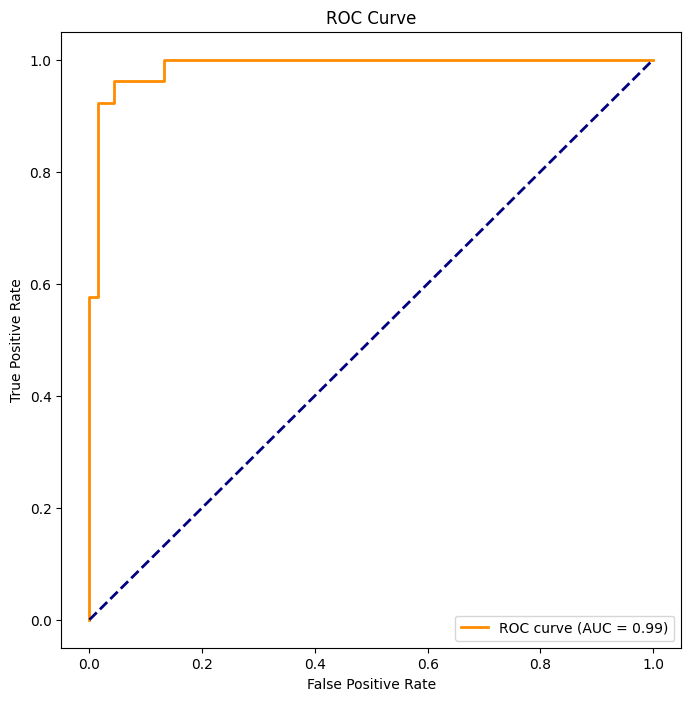

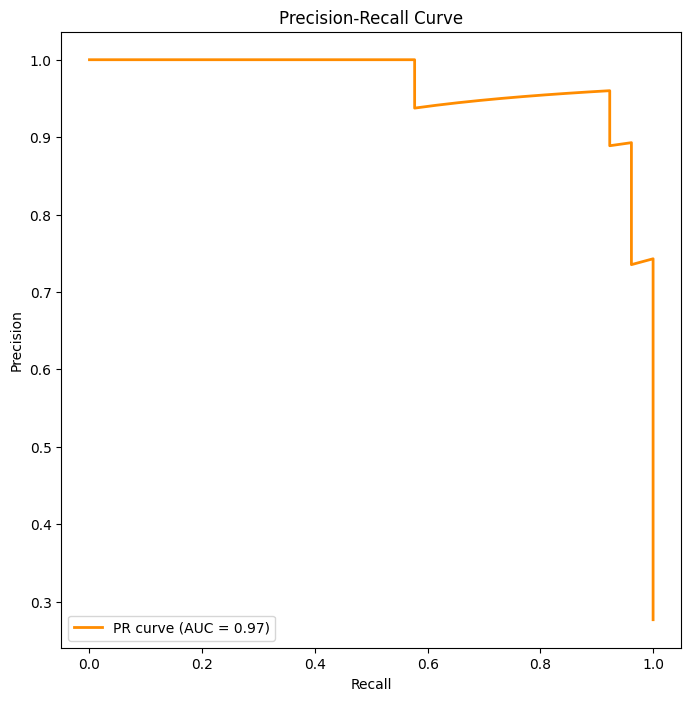

In [115]:
# Получение вероятностей предсказания для класса 1
y_probs = gbc.predict_proba(X_test)[:, 1]

# ROC-кривая
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Кривая точность-полнота (PR-кривая)
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)


plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

#Пункт 4

Разбить данные на обучающую и контрольную выборки. Построить ROC- кривую для каждой из подвыборок. Построить ROC- кривую на основе кроссвалидации.


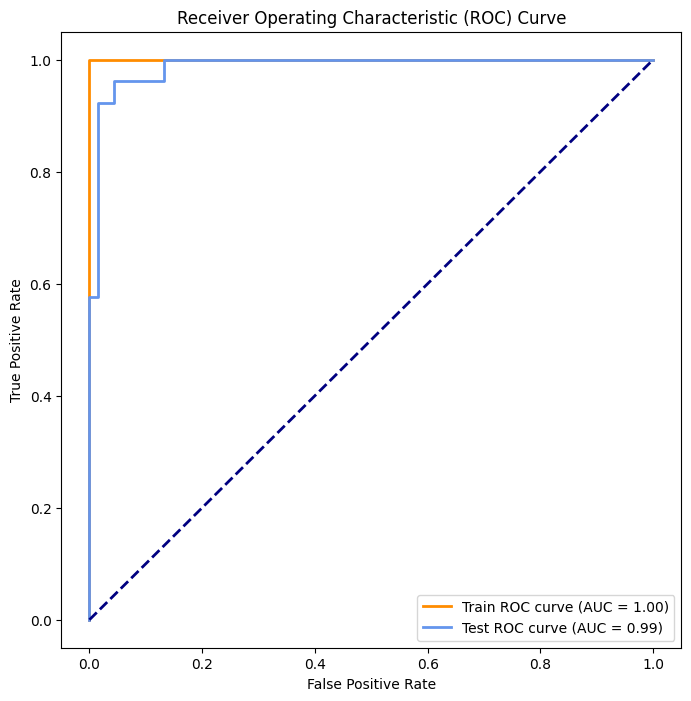

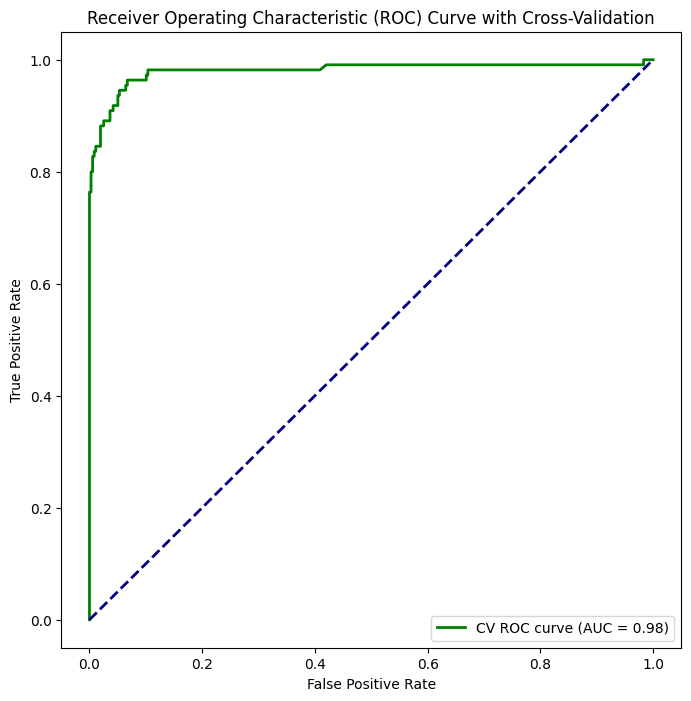

In [116]:
# Получение вероятностей принадлежности к классу 1 для обучающей выборки
y_train_prob = gbc.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

# Получение вероятностей принадлежности к классу 1 для контрольной выборки
y_test_prob = gbc.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Получение вероятностей принадлежности к классу 1 с использованием кросс-валидации
y_cv_prob = cross_val_predict(gbc, X, y, cv=10, method='predict_proba')[:, 1]
fpr_cv, tpr_cv, _ = roc_curve(y, y_cv_prob)
roc_auc_cv = auc(fpr_cv, tpr_cv)


plt.figure(figsize=(8, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='cornflowerblue', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(8, 8))
plt.plot(fpr_cv, tpr_cv, color='green', lw=2, label=f'CV ROC curve (AUC = {roc_auc_cv:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with Cross-Validation')
plt.legend(loc='lower right')
plt.show()

#Пункт 5

Исследовать влияние выбора критерия обучения на AUC. Один из критериев — log loss, ещё один или два — на выбор. Как вариант: сравнить AdaBoost с градиентным бустингом.


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

abc = AdaBoostClassifier().fit(X_train, y_train)
gbc = GradientBoostingClassifier().fit(X_train, y_train)

# Предсказания вероятностей для вычисления AUC
abc_prob = abc.predict_proba(X_test)[:, 1]
gb_prob = gbc.predict_proba(X_test)[:, 1]

# Вычисление AUC и log loss
auc_abc = roc_auc_score(y_test, abc_prob)
log_loss_abc = log_loss(y_test, abc_prob)

auc_gbc = roc_auc_score(y_test, gb_prob)
log_loss_gbc = log_loss(y_test, gb_prob)

print(f'AdaBoost AUC: {auc_abc}, Log Loss: {log_loss_abc}')
print(f'Gradient Boosting AUC: {auc_gbc}, Log Loss: {log_loss_gbc}')

AdaBoost AUC: 0.9909502262443438, Log Loss: 0.40204717934361744
Gradient Boosting AUC: 0.9915158371040723, Log Loss: 0.14242374570853966
